<a href="https://colab.research.google.com/github/yasmindneves/CalculadoraJava/blob/main/IA_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conhecer o Dataset

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
import warnings

warnings.filterwarnings('ignore')

## Dataset de exemplo

**Y = Gastos das famílias**

**X = Renda das famílias**

In [5]:
dataset = { 'Y': [3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849, 2184, 2943, 1357, 2755, 2163, 3099, 1600, 353, 1778, 740, 2129, 3302, 2412, 2683, 2515, 2395, 2292, 1000, 600, 1864, 3027, 1978, 2791, 1982, 900, 1964, 1247, 3067, 700, 1500, 3110, 2644, 1378, 2601, 501, 1292, 2125, 1431, 2260, 1770],
            'X': [9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632, 6825, 8918, 4100, 9184, 6180, 9997, 4500, 1069, 5925, 2466, 6083, 9712, 7780, 8383, 7185, 7483, 7640, 2100, 2000, 6012, 8902, 5345, 8210, 5662, 2700, 6546, 2900, 9894, 1500, 5000, 8885, 8813, 3446, 7881, 1164, 3401, 6641, 3329, 6648, 4800] }

In [6]:
dataset = pd.DataFrame(dataset)
dataset.head()

,Y,X
0,3011,9714
1,1305,3728
2,1879,6062
3,2654,8845
4,2849,8378


In [7]:
dataset.shape

(50, 2)

In [8]:
dataset.describe()

,Y,X
count,50.000000,50.000000
mean,2011.120000,6065.500000
std,817.214648,2707.187812
min,353.000000,1069.000000
25%,1362.250000,3516.500000
50%,2127.000000,6363.000000
75%,2675.750000,8381.750000
max,3302.000000,9997.000000


<Axes: title={'center': 'Box plot'}, xlabel='Reais (R$)'>

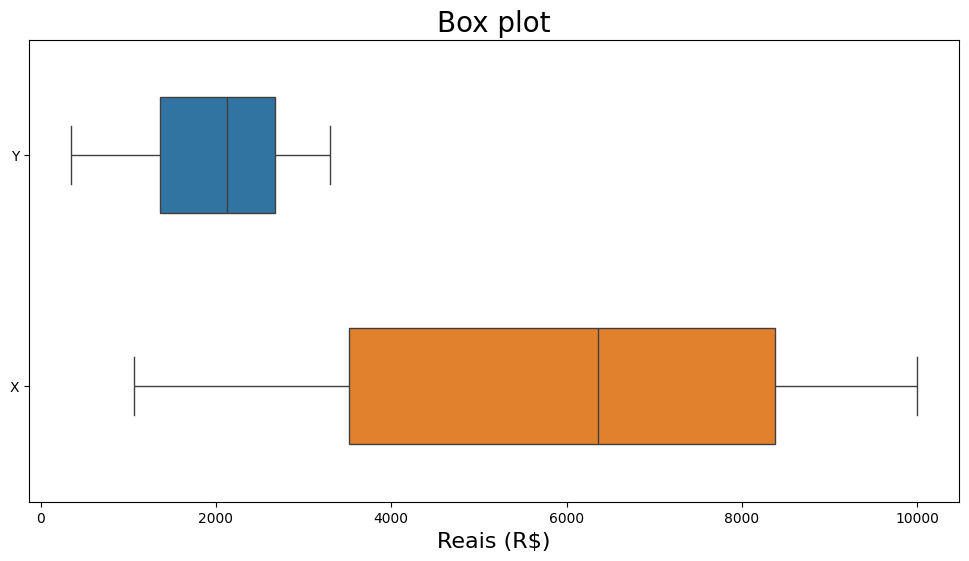

In [9]:
ax = sns.boxplot(data = dataset, orient = 'h', width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('Reais (R$)', fontsize=16)
ax

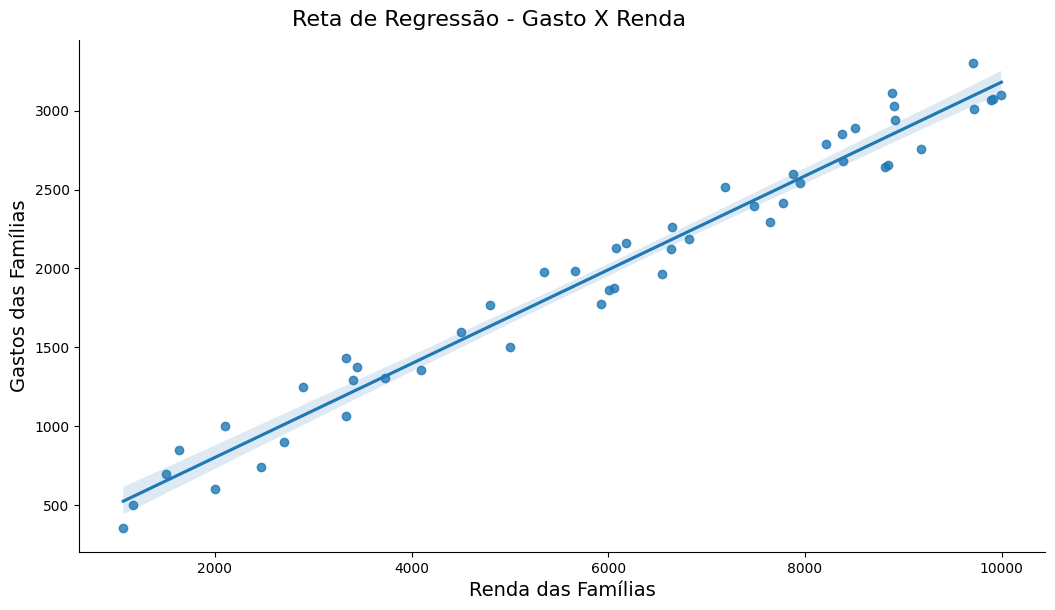

In [10]:
ax = sns.lmplot(data = dataset, x='X', y='Y')
ax.figure.set_size_inches(12,6)
ax.figure.suptitle('Reta de Regressão - Gasto X Renda', fontsize=16, y=1.02)
ax.set_xlabels('Renda das Famílias', fontsize=14)
ax.set_ylabels('Gastos das Famílias', fontsize=14)
ax

In [11]:
dataset.corr()

,Y,X
Y,1.000000,0.984835
X,0.984835,1.000000


# Rodando a regressão

In [12]:
import statsmodels.api as sm

In [13]:
Y = dataset.Y
X = sm.add_constant(dataset.X)

In [14]:
X.head()

,const,X
0,1.0,9714
1,1.0,3728
2,1.0,6062
3,1.0,8845
4,1.0,8378


In [15]:
resultado_regressao= sm.OLS(Y, X).fit()

In [16]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Wed, 20 Aug 2025   Prob (F-statistic):           3.56e-38
Time:                        17:27:51   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.0

In [17]:
dataset['Y_previsto'] = resultado_regressao.predict()
dataset

,Y,X,Y_previsto
0,3011,9714,3095.785086
1,1305,3728,1316.203010
2,1879,6062,2010.079483
3,2654,8845,2837.439476
4,2849,8378,2698.604723
5,1068,3338,1200.259640
6,2892,8507,2736.955222
7,2543,7947,2570.472435
8,3074,9915,3155.540515
9,849,1632,693.081721


## Função de Regressão populacional

A equação representada a seguir é conhecida como função de regressão populacional:

# $$E(Y|X_i) = \beta_1+\beta_2X_i$$

Ela afirma que o valor esperado da distribuição de $Y$, dado $X_i$ tem
regressão funcional com $X_i$, isto é, a resposta média de $Y$ varia com
$X$. Os coeficientes $\beta_1$ e $\beta_2$ são conhecidos como coeficientes
de regressão e também conhecidos como intercepto e coeficiente angular.

O gráfico e o exemplo deixa claro que com o aumento da renda familiar,
em média, as despesas de consumo das familias aumentam, mas não em mesmo
nível O que podemos dizer é que para um nível de renda $X_i$ as despesas
médias de consumo de uma família agrupam-se em torno do consumo médio de
todas as famílias deste nível $X_i$ (em torno de sua esperança condicional).
Portanto, podemos expressar o desvio individual de $Y_i$ em torno de seu
valor esperado da seguinte forma:

# $$u_i = Y_i - E(Y|X_i)$$

ou

# $$Y_i= u_i + E(Y|X_i)$$

onde o desvio $u_i$ é uma variável aleatória não-observável que assume
valores positivos ou negativos, também conhecida como erro estocástico.

Observe que podemos  representar a FRP em sua forma estocástica da
seguinte maneira:

# $$Y_i = \beta_1+\beta_2X_i +u_i$$


## O método dos mínimos quadrados

**Função de regressão da população (FRP)**

# $$Y_i = \beta_1+\beta_2X_i +u_i$$

A FRP não pode ser obtida de forma direta, então estimamos os Betas por meio de uma **função de regressão amostral (FRA)**

# $$Y_i = \hat{\beta_1}+\hat{\beta_2}X_i +\hat{u}_i$$

# $$Y_i = \hat{Y}_i +\hat{u}_i$$

# $$Y_i- \hat{Y}_i =\hat{u}_i$$

# $$Y_i -\hat{\beta_1}-\hat{\beta_2}X_i  =\hat{u}_i$$



<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img015.png" width=50%>


# $$\sum\hat{u}_i^2 = \sum{(Y_i - \hat{Y}_i)^2}$$

# $$
\begin{equation}
\boxed{\hat{\beta}_2 = \frac{n\sum{X_iY_i} - \sum{X_i}\sum{Y_i}}{n\sum{X_i^2} - (\sum{X_i})^2}}
\end{equation}
$$

# $$
\begin{equation}
\boxed{
\begin{eqnarray}
\hat{\beta}_1 &=& \frac{\sum{X_i^2}\sum{Y_i} - \sum{X_i}\sum{X_iY_i}}{n\sum{X_i^2} - (\sum{X_i})^2}\\
&=& \bar{Y} - \hat{\beta}_2\bar{X}
\end{eqnarray}
}
\end{equation}
$$

In [18]:
n = len(dataset)
n

50

In [19]:
SOMA_Y = dataset.Y.sum()
SOMA_Y

np.int64(100556)

In [20]:
SOMA_X = dataset.X.sum()
SOMA_X

np.int64(303275)

In [21]:
dataset['X2']=dataset.X**2
dataset.head()

,Y,X,Y_previsto,X2
0,3011,9714,3095.785086,94361796
1,1305,3728,1316.203010,13897984
2,1879,6062,2010.079483,36747844
3,2654,8845,2837.439476,78234025
4,2849,8378,2698.604723,70190884


In [22]:
SOMA_X2 = dataset.X2.sum()
SOMA_X2

np.int64(2198628939)

In [23]:
dataset['XY'] = dataset.X*dataset.Y
dataset.head()

,Y,X,Y_previsto,X2,XY
0,3011,9714,3095.785086,94361796,29248854
1,1305,3728,1316.203010,13897984,4865040
2,1879,6062,2010.079483,36747844,11390498
3,2654,8845,2837.439476,78234025,23474630
4,2849,8378,2698.604723,70190884,23868922


In [24]:
SOMA_XY = dataset.XY.sum()
SOMA_XY

np.int64(716683794)

In [25]:
dataset.drop(['X2', 'XY'], axis=1, inplace=True)
dataset.head()

,Y,X,Y_previsto
0,3011,9714,3095.785086
1,1305,3728,1316.203010
2,1879,6062,2010.079483
3,2654,8845,2837.439476
4,2849,8378,2698.604723


In [26]:
numerador = n * SOMA_XY - SOMA_X * SOMA_Y
denominador = n * SOMA_X2 - (SOMA_X)**2
beta_2 = numerador/denominador
beta_2

np.float64(0.29729069099372424)

# $$
\begin{equation}
\boxed{\hat{\beta}_2 = \frac{n\sum{X_iY_i} - \sum{X_i}\sum{Y_i}}{n\sum{X_i^2} - (\sum{X_i})^2}}
\end{equation}
$$

# $$
\begin{equation}
\boxed{
\begin{eqnarray}
\hat{\beta}_1 &=& \frac{\sum{X_i^2}\sum{Y_i} - \sum{X_i}\sum{X_iY_i}}{n\sum{X_i^2} - (\sum{X_i})^2}\\
&=& \bar{Y} - \hat{\beta}_2\bar{X}
\end{eqnarray}
}
\end{equation}
$$

In [27]:
beta_1 = dataset.Y.mean() - beta_2 * dataset.X.mean()
beta_1

np.float64(207.90331377756547)

In [28]:
import statsmodels.api as sm

In [29]:
Y = dataset.Y
X = sm.add_constant(dataset.X)

In [30]:
resultado_regressao = sm.OLS(Y, X, missing = 'drop').fit()

In [31]:
resultado_regressao.params

,0
const,207.903314
X,0.297291


In [32]:
resultado_regressao.params[0]

np.float64(207.90331377756553)

In [33]:
resultado_regressao.params[1]

np.float64(0.29729069099372435)

In [34]:
beta_1=resultado_regressao.params[0]

# $$\hat{Y}_i = 207,9033 + 0,2973X_i$$

In [35]:
dataset['Y_previsto2'] = beta_1 +beta_2 * dataset.X
dataset

,Y,X,Y_previsto,Y_previsto2
0,3011,9714,3095.785086,3095.785086
1,1305,3728,1316.203010,1316.203010
2,1879,6062,2010.079483,2010.079483
3,2654,8845,2837.439476,2837.439476
4,2849,8378,2698.604723,2698.604723
5,1068,3338,1200.259640,1200.259640
6,2892,8507,2736.955222,2736.955222
7,2543,7947,2570.472435,2570.472435
8,3074,9915,3155.540515,3155.540515
9,849,1632,693.081721,693.081721


In [36]:
def prever(x):
  return beta_1 +beta_2 * x

In [37]:
prever(7510)

np.float64(2440.5564031404347)

In [38]:
resultado_regressao.predict([1, 7510])[0]

np.float64(2440.556403140435)

In [39]:
dataset['u'] = dataset.Y - dataset.Y_previsto
dataset.head()

,Y,X,Y_previsto,Y_previsto2,u
0,3011,9714,3095.785086,3095.785086,-84.785086
1,1305,3728,1316.203010,1316.203010,-11.203010
2,1879,6062,2010.079483,2010.079483,-131.079483
3,2654,8845,2837.439476,2837.439476,-183.439476
4,2849,8378,2698.604723,2698.604723,150.395277


In [40]:
dataset.drop(['Y_previsto2'], axis=1, inplace=True)
dataset.head()

,Y,X,Y_previsto,u
0,3011,9714,3095.785086,-84.785086
1,1305,3728,1316.203010,-11.203010
2,1879,6062,2010.079483,-131.079483
3,2654,8845,2837.439476,-183.439476
4,2849,8378,2698.604723,150.395277


<Axes: title={'center': 'Residuos vs Y_previsto'}, xlabel='X', ylabel='Resíduos'>

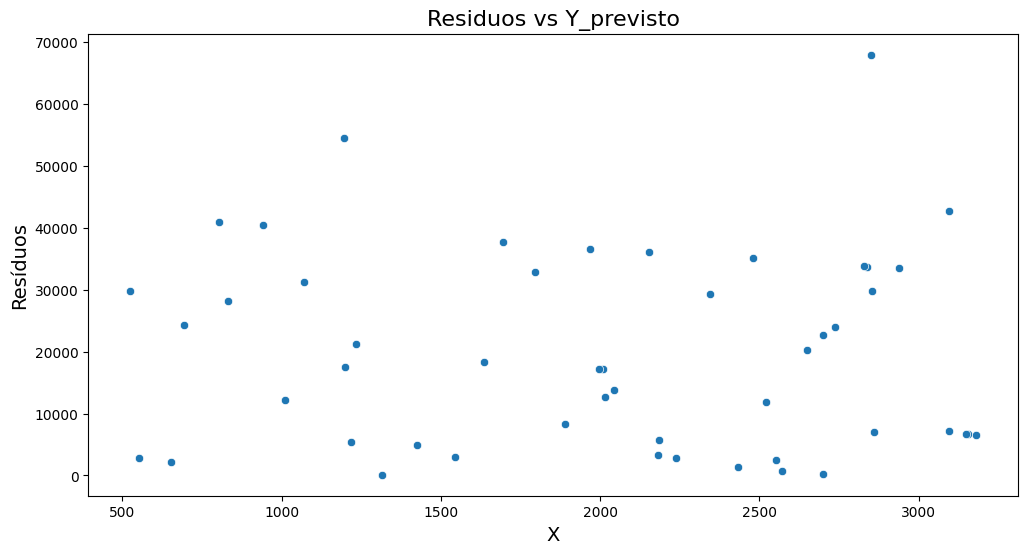

In [41]:
ax = sns.scatterplot(x=dataset.Y_previsto, y=dataset.u**2)
ax. figure.set_size_inches(12,6)
ax.set_title('Residuos vs Y_previsto', fontsize=16)
ax.set_xlabel('X',fontsize=14)
ax.set_ylabel('Resíduos',fontsize=14)
ax



<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img028.jpg" width=80%>


In [42]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Wed, 20 Aug 2025   Prob (F-statistic):           3.56e-38
Time:                        17:27:52   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.0

# SKLEARN

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(dataset.X.to_numpy().reshape(-1, 1), dataset.Y.to_numpy().reshape(-1, 1),
                                        test_size=0.3, random_state=42)

In [45]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [46]:
modelo = KNeighborsRegressor(n_neighbors=2)

In [47]:
modelo.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [48]:
print('R²={}'.format(modelo.score(x_train, y_train)))

R²=0.9765241276501617


In [49]:
y_previsto = modelo.predict(x_test)

In [50]:
print('R²={}'.format(metrics.r2_score(y_test, y_previsto)))

R²=0.9534544590257996


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [52]:
modelo = LinearRegression()

In [53]:
modelo.fit(x_train, y_train)

LinearRegression()

In [54]:
print('R²={}'.format(modelo.score(x_train, y_train)))

R²=0.9691889616745901


In [55]:
y_previsto = modelo.predict(x_test)

In [56]:
print('R²={}'.format(metrics.r2_score(y_test, y_previsto)))

R²=0.9676441727801287
